# `OLA DRIVER PROJECT`

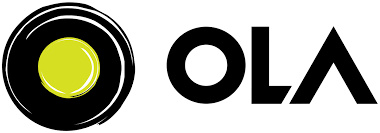

## Problem Statement

### _Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates._

### _As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones._

### _You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like_

#### 1) Demographics (city, age, gender etc.)
#### 2)Tenure information (joining date, Last Date)
#### 3) Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

## Column Profiling:

### MMMM-YY : Reporting Date (Monthly)
### Driver_ID : Unique id for drivers
### Age : Age of the driver
### Gender : Gender of the driver – Male : 0, Female: 1
### City : City Code of the driver
### Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
### Income : Monthly average Income of the driver
### Date Of Joining : Joining date for the driver
### LastWorkingDate : Last date of working for the driver
### Joining Designation : Designation of the driver at the time of joining
### Grade : Grade of the driver at the time of reporting
### Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
### Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


## Concepts Tested:

### 1) Ensemble Learning- Bagging
### 2) Ensemble Learning- Boosting
### 3) KNN Imputation of Missing Values
### 4) Working with an imbalanced dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
# from sklearn.metrics import (
#  accuracy_score, confusion_matrix, classification_report,
#  roc_auc_score, roc_curve, auc,
#  plot_confusion_matrix, plot_roc_curve
# )
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

In [3]:
pwd

'C:\\Users\\HP'

In [2]:
ola = pd.read_csv('ola_driver_scaler.csv')
# pd.set_option('display.max_columns', 500)

In [5]:
ola

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


# `EXPLORATORY DATA ANALYSIS`

In [6]:
print('Rows in the ola dataset: ',ola.shape[0])
print('Columns in the ola dataset: ',ola.shape[1])

Rows in the ola dataset:  19104
Columns in the ola dataset:  14


In [7]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [8]:
ola.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
ola.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


#### Correlation Heatmap -
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions,
using colored cells to represent data from usually a monochromatic scale. The values of the first dimension
appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional
to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for
data analysis since it makes patterns easily readable and highlights the differences and variation in the same
data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and
comprehensible.

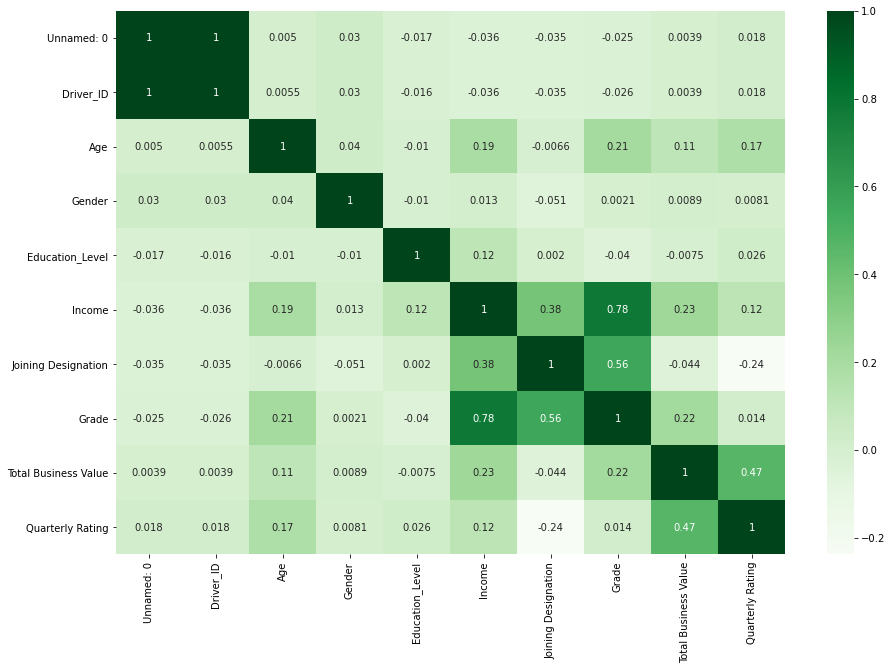

In [10]:
corr = ola.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

In [11]:
# since  unnamed and driver_id columns have the highest correlation and they r the same
# here, dropping unnamed column

In [12]:
ola.drop(columns='Unnamed: 0',axis=1,inplace=True)

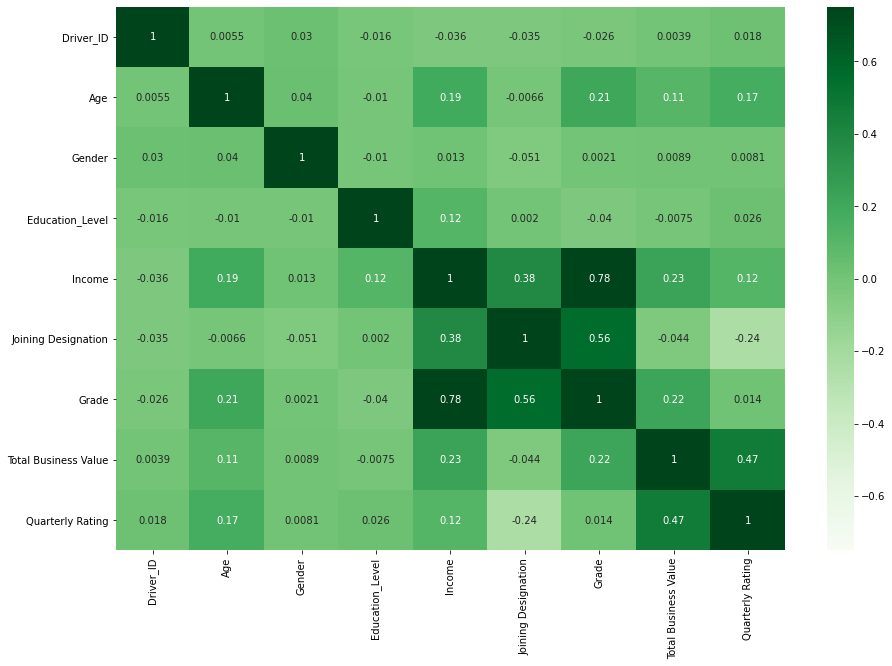

In [13]:
corr = ola.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Greens',vmax=0.75,vmin=-0.75)
plt.show()

In [14]:
ola.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [15]:
ola.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# `DATA TRANSFORMATION AND FEATURE ENGINEERING`

In [5]:
ola1 = ola.copy(deep=True)

In [6]:
ola1.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
QR = pd.DataFrame(
    ola1.groupby('Driver_ID')['Quarterly Rating'].unique()).reset_index()
a = ola1.groupby('Driver_ID')['Quarterly Rating'].first().reset_index()
b = ola1.groupby('Driver_ID')['Quarterly Rating'].last().reset_index().rename(
                   columns={'Quarterly Rating': 'QR'})
QR = a.merge(b,on= 'Driver_ID')
QR['inc_rating'] = np.where(QR['QR']>QR['Quarterly Rating'],1,0)
QR = QR[['Driver_ID','inc_rating']]


# Set income increased to 1
Incm = pd.DataFrame(
    ola1.groupby('Driver_ID',
               dropna=False)['Income'].first()).reset_index()
Incm1 = pd.DataFrame(
    ola1.groupby('Driver_ID',
               dropna=False)['Income'].last()).reset_index().rename(columns={'Income':'I'})
QR['inc_incm'] = np.where(Incm1['I'] >Incm['Income'],1,0)



# merged
ola1 = ola1.merge(QR,on='Driver_ID')

In [8]:
ola1

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,inc_rating,inc_incm
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,0,0
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3,1,0
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3,1,0
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2,1,0
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2,1,0


In [9]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'first',
             'Grade':'first',
            'inc_rating':'last',
             'inc_incm':'last',
             'Quarterly Rating':'mean'}
ola1 = ola1.groupby([ola1['Driver_ID']]).aggregate(functions)
ola1['Quarterly Rating']= ola1['Quarterly Rating'].round(decimals = 2)
ola1['month'] = pd.to_datetime(ola['Dateofjoining']).dt.month
ola1['year'] = pd.DatetimeIndex(ola1['Dateofjoining']).year
ola1.rename(columns={'MMM-YY':'rprt_cnt'},inplace=True)

In [10]:
ola1.reset_index(drop=True, inplace=True)

In [11]:
ola1

,rprt_cnt,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,inc_rating,inc_incm,Quarterly Rating,month,year
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,0,0,2.00,12,2018
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,0,0,1.00,12,2020
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,0,0,1.00,11,2019
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,0,0,1.00,12,2019
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,0,1.60,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34.0,0.0,C24,0,15/10/15,None,3,21748820,1987560,2,1,0,2.62,4,2015
2377,3,2785,34.0,1.0,C9,0,28/08/20,28/10/20,1,0,36315,1,0,0,1.00,4,2020
2378,9,2786,45.0,0.0,C19,0,31/07/18,22/09/19,2,2815090,318330,2,0,0,1.67,4,2018
2379,6,2787,28.0,1.0,C20,2,21/07/18,20/06/19,1,977830,416988,1,0,0,1.50,4,2018


In [12]:
ola1['target'] = np.where(ola1['LastWorkingDate'].isna(),0,1)

In [24]:
ola1

,rprt_cnt,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,inc_rating,inc_incm,Quarterly Rating,month,year,target
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,0,0,2.00,12,2018,1
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,0,0,1.00,12,2020,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,0,0,1.00,11,2019,1
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,0,0,1.00,12,2019,1
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,0,1.60,12,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34.0,0.0,C24,0,15/10/15,None,3,21748820,1987560,2,1,0,2.62,4,2015,0
2377,3,2785,34.0,1.0,C9,0,28/08/20,28/10/20,1,0,36315,1,0,0,1.00,4,2020,1
2378,9,2786,45.0,0.0,C19,0,31/07/18,22/09/19,2,2815090,318330,2,0,0,1.67,4,2018,1
2379,6,2787,28.0,1.0,C20,2,21/07/18,20/06/19,1,977830,416988,1,0,0,1.50,4,2018,1


In [13]:
ola1.drop(columns=['Dateofjoining','LastWorkingDate'],axis=1,inplace=True)

In [14]:
print('Rows in the transformed dataset:',ola1.shape[0])
print('Columns in the transformed dataset:',ola1.shape[1])

Rows in the transformed dataset: 2381
Columns in the transformed dataset: 16


In [27]:
ola1.nunique()

rprt_cnt                  24
Driver_ID               2381
Age                       36
Gender                     2
City                      29
Education_Level            3
Grade                      5
Total Business Value    1629
Income                  2373
Joining Designation        5
inc_rating                 2
inc_incm                   2
Quarterly Rating         143
month                     12
year                       8
target                     2
dtype: int64

In [28]:
ola1.isna().sum()

rprt_cnt                0
Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Grade                   0
Total Business Value    0
Income                  0
Joining Designation     0
inc_rating              0
inc_incm                0
Quarterly Rating        0
month                   0
year                    0
target                  0
dtype: int64

In [29]:
!pip install missingno

<AxesSubplot:>

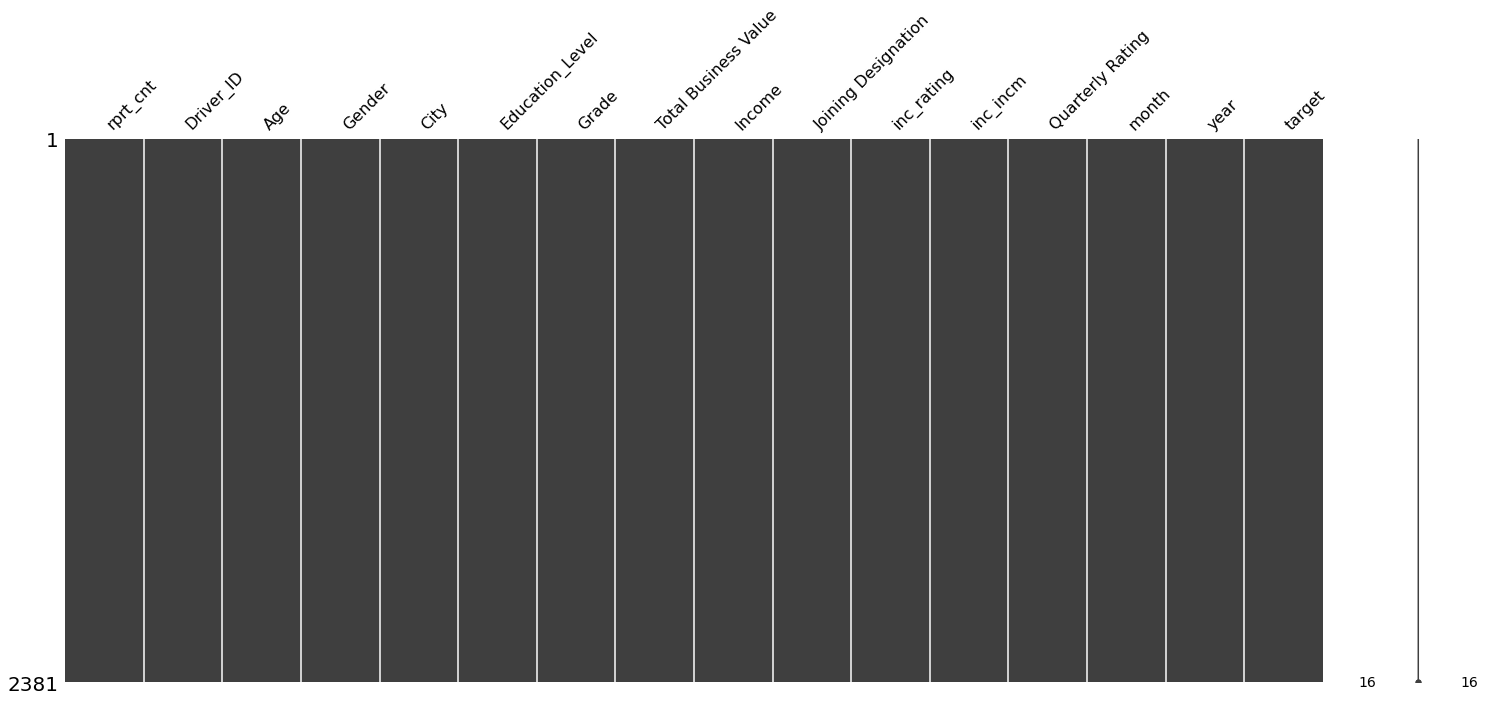

In [30]:
import missingno as msno

msno.matrix(ola1)

In [31]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rprt_cnt              2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   float64
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   Income                2381 non-null   int64  
 9   Joining Designation   2381 non-null   int64  
 10  inc_rating            2381 non-null   int32  
 11  inc_incm              2381 non-null   int32  
 12  Quarterly Rating      2381 non-null   float64
 13  month                 2381 non-null   int64  
 14  year                  2381 non-null   int64  
 15  target               

In [32]:
ola1.describe()

,rprt_cnt,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,inc_rating,inc_incm,Quarterly Rating,month,year,target
count,2381.00000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2.381000e+03,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,8.02352,1397.559009,33.663167,0.410332,1.00756,2.078538,4.586742e+06,5.267603e+05,1.820244,0.150357,0.018060,1.566384,6.975220,2018.536329,0.678706
std,6.78359,806.161628,5.983375,0.491997,0.81629,0.931321,9.127115e+06,6.231633e+05,0.841433,0.357496,0.133195,0.719660,3.007801,1.609597,0.467071
min,1.00000,1.000000,21.000000,0.000000,0.00000,1.000000,-1.385530e+06,1.088300e+04,1.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,0.000000
25%,3.00000,695.000000,29.000000,0.000000,0.00000,1.000000,0.000000e+00,1.398950e+05,1.000000,0.000000,0.000000,1.000000,5.000000,2018.000000,0.000000
50%,5.00000,1400.000000,33.000000,0.000000,1.00000,2.000000,8.176800e+05,2.929800e+05,2.000000,0.000000,0.000000,1.000000,7.000000,2019.000000,1.000000
75%,10.00000,2100.000000,37.000000,1.000000,2.00000,3.000000,4.173650e+06,6.514560e+05,2.000000,0.000000,0.000000,2.000000,10.000000,2020.000000,1.000000
max,24.00000,2788.000000,58.000000,1.000000,2.00000,5.000000,9.533106e+07,4.522032e+06,5.000000,1.000000,1.000000,4.000000,12.000000,2020.000000,1.000000


In [33]:
ola1.describe(include='object')

,City
count,2381
unique,29
top,C20
freq,152


# `Data Visualization`

## Univariate Analysis

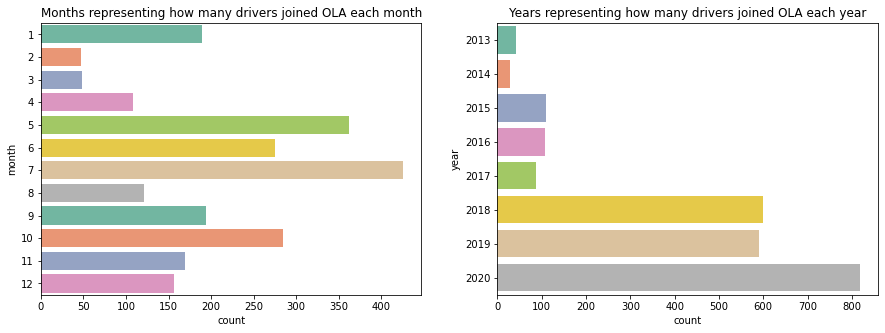

In [34]:
# figure1
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=ola1.month,palette='Set2')
plt.title('Months representing how many drivers joined OLA each month')


ax = fig.add_subplot(1,2,2)
sns.countplot(y=ola1.year,palette='Set2')
plt.title('Years representing how many drivers joined OLA each year')
plt.show()

### Observations:

    - July received the maximum number of drivers in 8 years.
    - February and March receives the least number of Drivers joining OLA.
    - Joining of Drivers receives a boost after year 2017.
    

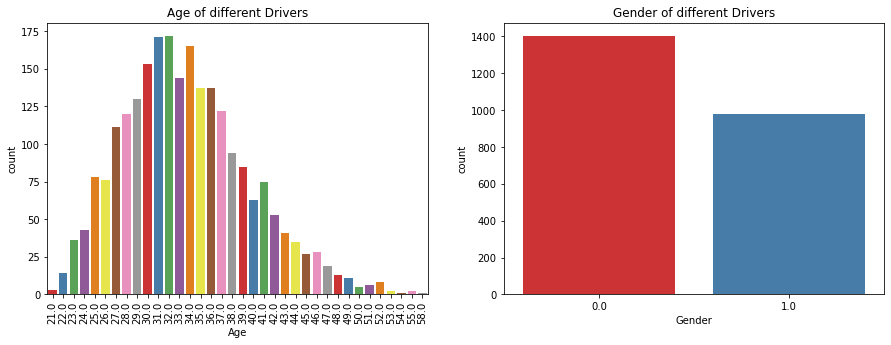

In [84]:
# figure2
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
sns.countplot(ola1.Age,palette='Set1')
plt.title('Age of different Drivers')
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(ola1.Gender,palette='Set1')
plt.title('Gender of different Drivers')
plt.show()


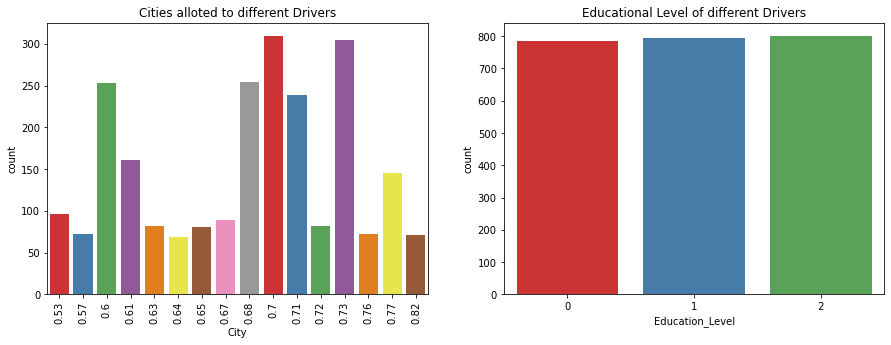

In [85]:
# figure3
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
sns.countplot(ola1.City,palette='Set1')
plt.title('Cities alloted to different Drivers')
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(ola1.Education_Level,palette='Set1')
plt.title('Educational Level of different Drivers')
plt.show()

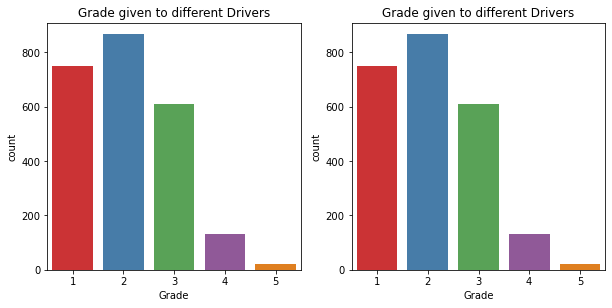

In [92]:
# figure4
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
sns.countplot(ola1.Grade,palette='Set1')
plt.title('Grade given to different Drivers')

ax = fig.add_subplot(222)
sns.countplot(ola1.Grade,palette='Set1')
plt.title('Grade given to different Drivers')
plt.show()

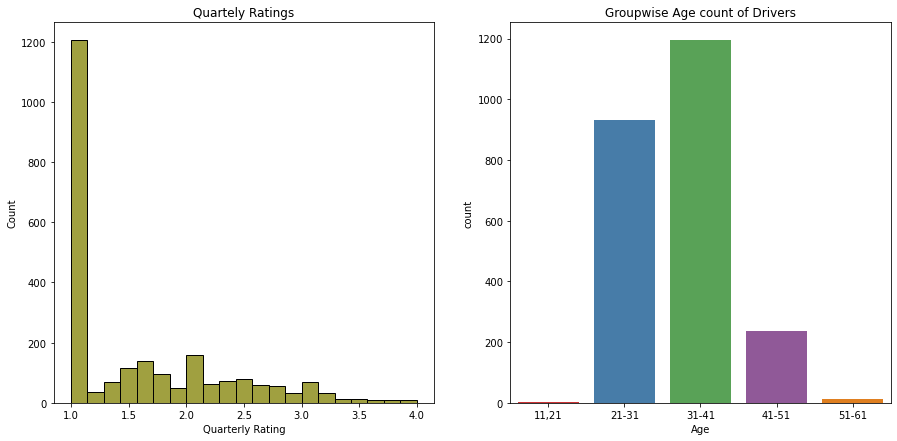

In [91]:
# figure5
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(121)
bins='auto'
sns.histplot(ola1['Quarterly Rating'],color='olive',bins=bins)
plt.title('Quartely Ratings')

ax = fig.add_subplot(122)
a = pd.cut(x=ola1.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(a,palette='Set1')
plt.title('Groupwise Age count of Drivers')
plt.show()

### Observations:

    - Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years o
    meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
    - 58.9% of the Drivers are male.
    - City C20 has been used by the most of the drivers.
    - There are 3 Education levels and all of them alomst have the equal distribution of Drivers.
    - Grade 2 has been received by most of the Drivers and then the graph keeps on falling.

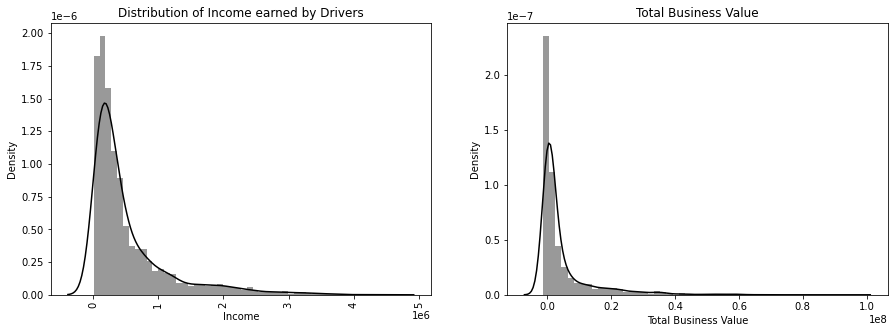

In [37]:
# figure6
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.distplot(ola1.Income,kde=True,color='black')
plt.title('Distribution of Income earned by Drivers')
plt.xticks(rotation=90)
ax = fig.add_subplot(1,2,2)
sns.distplot(ola1['Total Business Value'],kde=True,color='black')
plt.title('Total Business Value')
plt.show()

## Bivariate Analysis

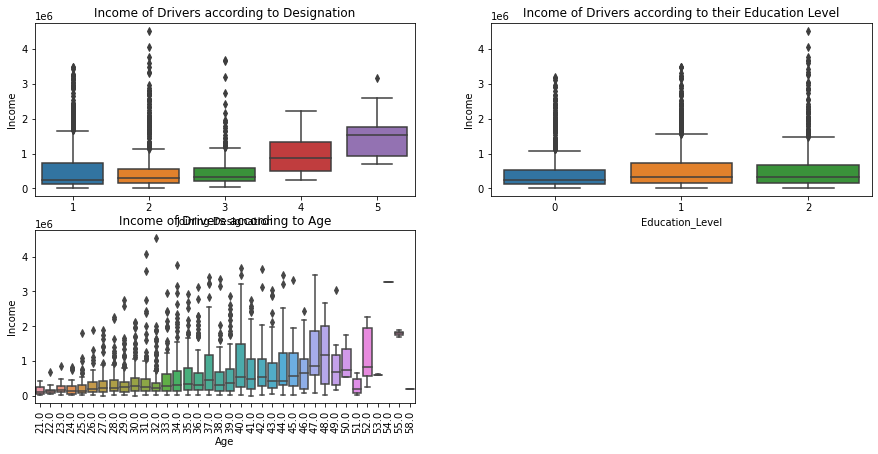

In [94]:
# figure7
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(221)
sns.boxplot(x=ola1['Joining Designation'],y=ola1.Income)
plt.title('Income of Drivers according to Designation')

ax = fig.add_subplot(222)
sns.boxplot(x=ola1.Education_Level,y=ola1.Income)
plt.title('Income of Drivers according to their Education Level')

ax = fig.add_subplot(223)
sns.boxplot(data=ola1, x="Age", y="Income")
plt.title('Income of Drivers according to Age')
plt.xticks(rotation=90)
plt.show()

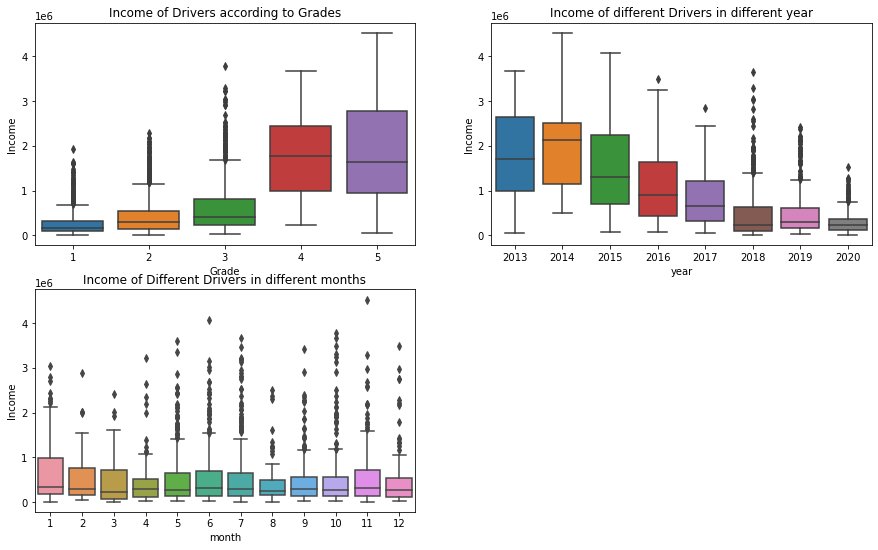

In [98]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(221)
sns.boxplot(x=ola1.Grade,y=ola1.Income)
plt.title('Income of Drivers according to Grades')


ax = fig.add_subplot(222)
sns.boxplot(x=ola1['year'],y=ola1.Income)
plt.title('Income of different Drivers in different year')

ax = fig.add_subplot(223)
sns.boxplot(x=ola1['month'],y=ola1.Income)
plt.title('Income of Different Drivers in different months')
plt.show()


### Observations:

    - People with joining designation 4 and 5 have higher income.
    - Outliers can be seen in Income with respect to Education level.
    - Outliers in income decreases as increase in ages of the Drivers.
    - Income of Drivers with Grade 4 and 5 have are higher earning.
    - Income of Drivers decreses with time during 8 years.

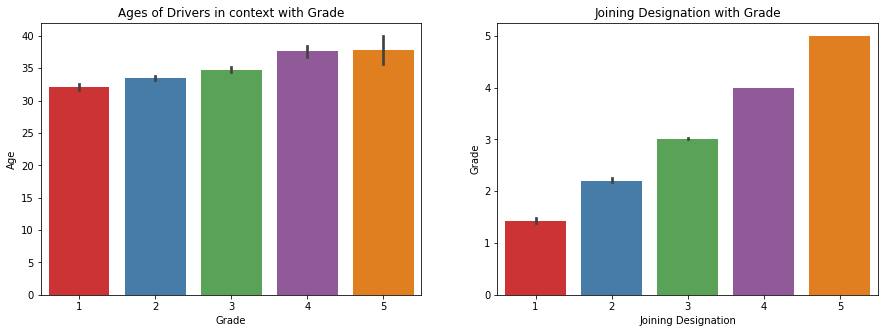

In [39]:
# figure5 
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.barplot(data=ola1, x="Grade", y="Age",palette='Set1')
plt.title('Ages of Drivers in context with Grade')

ax = fig.add_subplot(1,2,2)
sns.barplot(data=ola1, x="Joining Designation", y="Grade",palette='Set1')
plt.title('Joining Designation with Grade')
plt.show()

### Observations:

    - Increse in Age, Increse in Grade.
    - Joining Designation increses with Grade.
  

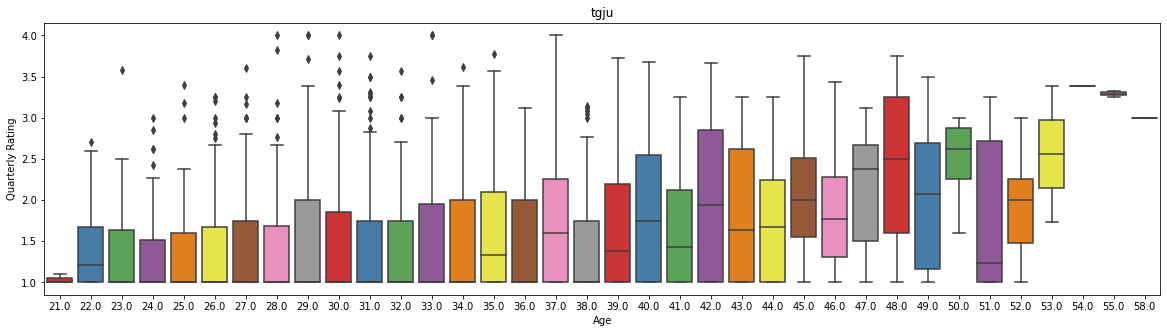

In [40]:
# figure6
plt.figure(figsize=(20,5))
sns.boxplot(x=ola1['Age'],y=ola1["Quarterly Rating"],palette='Set1')
plt.title('tgju')
plt.show()

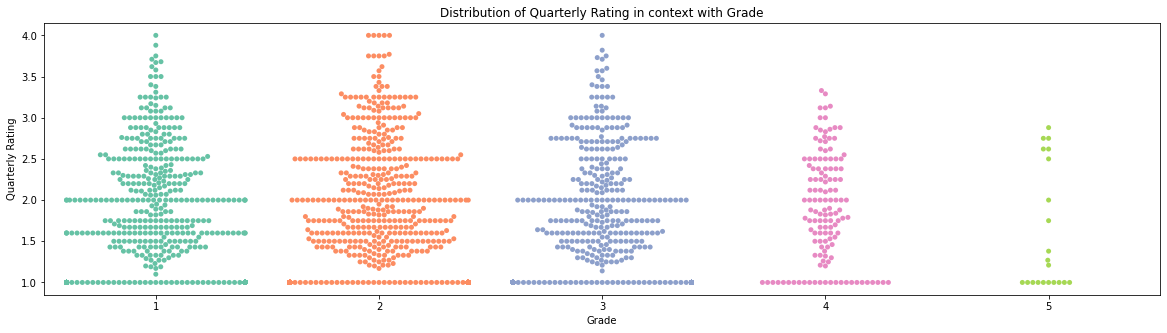

In [41]:
# figure7
plt.figure(figsize=(20,5))
sns.swarmplot(x=ola1['Grade'],y=ola1["Quarterly Rating"],palette='Set2')
plt.title('Distribution of Quarterly Rating in context with Grade')
plt.show()

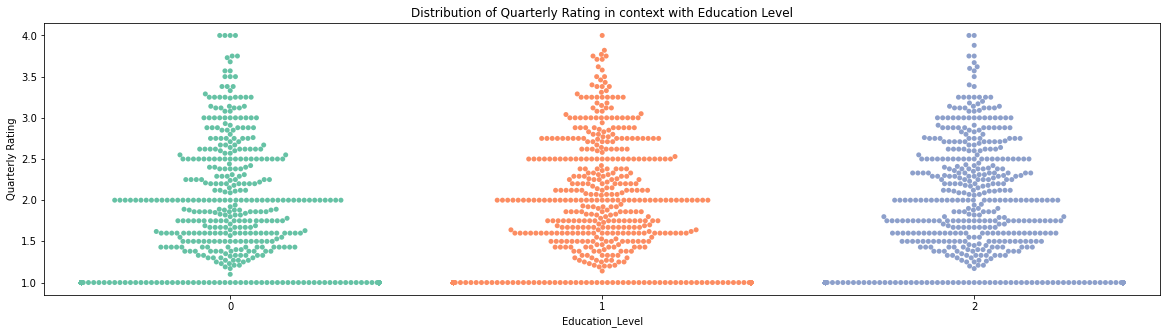

In [42]:
# figure8
plt.figure(figsize=(20,5))
sns.swarmplot(x=ola1['Education_Level'],y=ola1["Quarterly Rating"],palette='Set2')
# plt.xticks(rotation=90)
plt.title('Distribution of Quarterly Rating in context with Education Level')
plt.show()

In [43]:
pip install category_encoders

In [15]:
from category_encoders import TargetEncoder
TEncoder = TargetEncoder()
ola1['City'] = TEncoder.fit_transform(ola1['City'],ola1["target"]).round(2)

In [16]:
ola1

,rprt_cnt,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,inc_rating,inc_incm,Quarterly Rating,month,year,target
0,3,1,28.0,0.0,0.77,2,1,1715580,172161,1,0,0,2.00,12,2018,1
1,2,2,31.0,0.0,0.68,2,2,0,134032,2,0,0,1.00,12,2020,0
2,5,4,43.0,0.0,0.82,2,2,350000,328015,2,0,0,1.00,11,2019,1
3,3,5,29.0,0.0,0.71,0,1,120360,139104,1,0,0,1.00,12,2019,1
4,5,6,31.0,1.0,0.70,1,3,1265000,393640,3,1,0,1.60,12,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34.0,0.0,0.70,0,3,21748820,1987560,2,1,0,2.62,4,2015,0
2377,3,2785,34.0,1.0,0.71,0,1,0,36315,1,0,0,1.00,4,2020,1
2378,9,2786,45.0,0.0,0.57,0,2,2815090,318330,2,0,0,1.67,4,2018,1
2379,6,2787,28.0,1.0,0.73,2,1,977830,416988,1,0,0,1.50,4,2018,1


In [46]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rprt_cnt              2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   float64
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   float64
 5   Education_Level       2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   Income                2381 non-null   int64  
 9   Joining Designation   2381 non-null   int64  
 10  inc_rating            2381 non-null   int32  
 11  inc_incm              2381 non-null   int32  
 12  Quarterly Rating      2381 non-null   float64
 13  month                 2381 non-null   int64  
 14  year                  2381 non-null   int64  
 15  target               

# `OUTLIER TREATMENT`

In [47]:
ola2 = ola1.copy(deep=True)
def remove_outliers(column,df2):
    q1 = ola2[column].quantile(.25)
    q3 = ola2[column].quantile(.75)
    iqr = q3 - q1
    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr
    sns.boxplot(y=ola2.loc[((ola2[column]>=minn) & (ola2[column]<=maxx))][column])

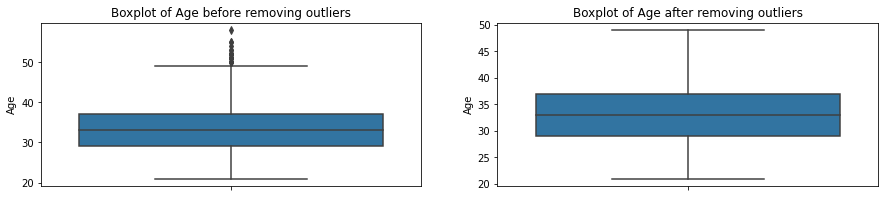

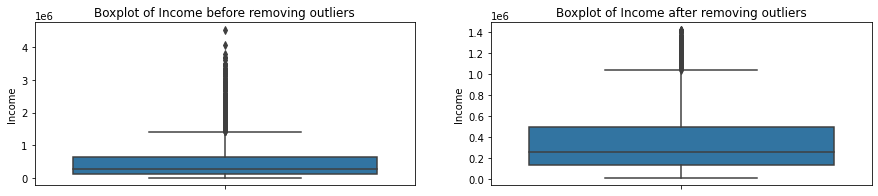

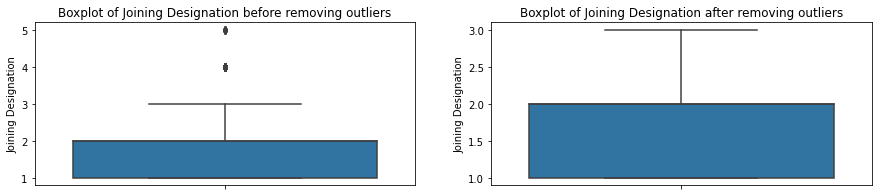

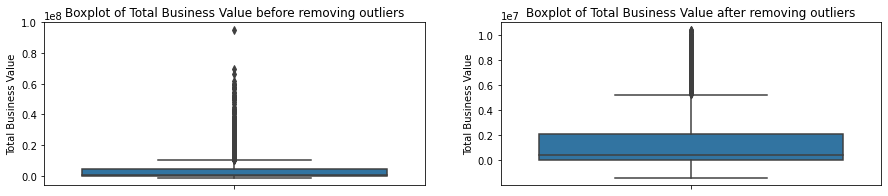

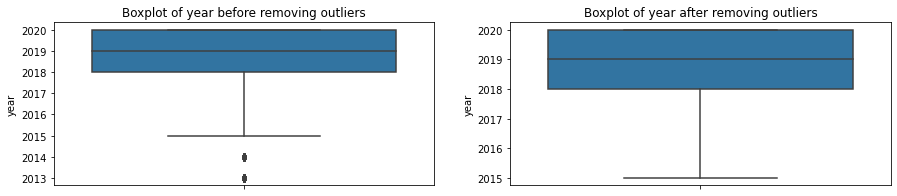

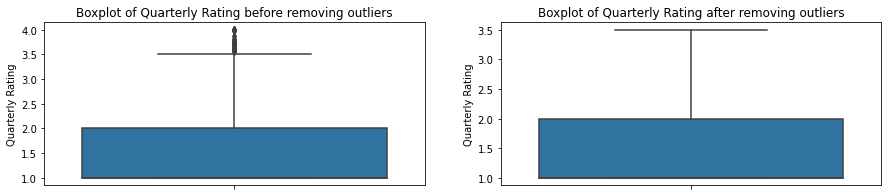

In [48]:
col = ['Age', 'Income', 'Joining Designation','Total Business Value', 'year','Quarterly Rating',]
for i in col:
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    sns.boxplot(y=ola2[i])
    plt.title(f"Boxplot of {i} before removing outliers",)
    plt.subplot(122)
    remove_outliers(i,ola2)
    plt.title(f"Boxplot of {i} after removing outliers")
    plt.show()


# `ENSEMBLE LEARNING: BAGGING `

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
X = ola1.drop('target',axis=1)
y = ola1['target']

In [19]:
X.head()

,rprt_cnt,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,inc_rating,inc_incm,Quarterly Rating,month,year
0,3,1,28.0,0.0,0.77,2,1,1715580,172161,1,0,0,2.0,12,2018
1,2,2,31.0,0.0,0.68,2,2,0,134032,2,0,0,1.0,12,2020
2,5,4,43.0,0.0,0.82,2,2,350000,328015,2,0,0,1.0,11,2019
3,3,5,29.0,0.0,0.71,0,1,120360,139104,1,0,0,1.0,12,2019
4,5,6,31.0,1.0,0.70,1,3,1265000,393640,3,1,0,1.6,12,2020


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)

In [21]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=6),n_estimators=3)

dtree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=6),
                  n_estimators=3)

In [22]:
y_pred = dtree.predict(X_test)
prob = dtree.predict_proba(X_test)

In [23]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))
print('Accuracy of thye model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, prob[:, 1]))

Train data accuracy: 0.8975840336134454
Test data accuracy: 0.8637316561844863
Accuracy of thye model: 0.8637316561844863
ROC-AUC score test dataset:  0.9441386675429227


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       148
           1       0.94      0.85      0.90       329

    accuracy                           0.86       477
   macro avg       0.84      0.87      0.85       477
weighted avg       0.88      0.86      0.87       477



In [25]:
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(cm)

[[131  17]
 [ 48 281]]


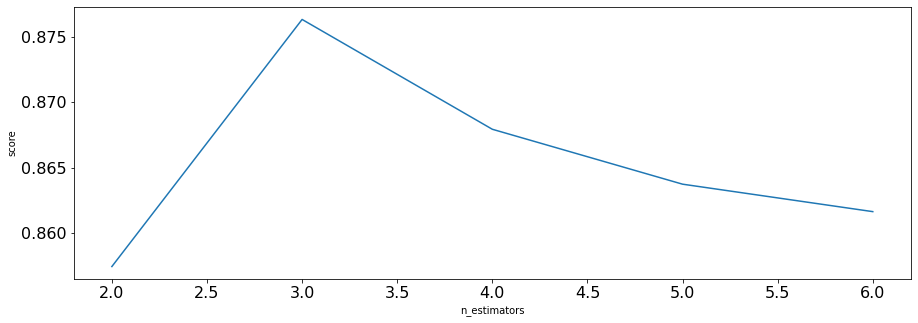

In [59]:
estimator_range = [2,3,4,5,6]

models = []
scores = []

for n_estimators in estimator_range:

    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(
 class_weight='balanced', max_depth=6),n_estimators = n_estimators, random_state = 1)


    clf.fit(X_train, y_train)


    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))


plt.figure(figsize=(15,5))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.tick_params(labelsize = 16)
plt.show()

In [60]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(
 class_weight='balanced', max_depth=6),n_estimators=3)

dtree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=6),
                  n_estimators=3)

In [27]:
y_pred = dtree.predict(X_test)
prob = dtree.predict_proba(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))
print('Accuracy of thye model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, prob[:, 1]))

Train data accuracy: 0.8975840336134454
Test data accuracy: 0.8637316561844863
Accuracy of thye model: 0.8637316561844863
ROC-AUC score test dataset:  0.9441386675429227


In [28]:
print('*'*60)
print(classification_report(y_test, y_pred))
print('*'*60)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print('*'*60)

************************************************************
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       148
           1       0.94      0.85      0.90       329

    accuracy                           0.86       477
   macro avg       0.84      0.87      0.85       477
weighted avg       0.88      0.86      0.87       477

************************************************************
Confusion Matrix
[[131  17]
 [ 48 281]]
************************************************************


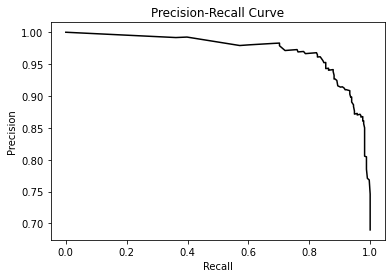

In [29]:
from sklearn.metrics import precision_recall_curve
y_score = dtree.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='black')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

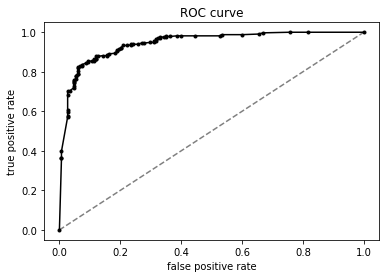

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='black')
plt.title("ROC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# show the plot
plt.show()

In [41]:
y_test.shape

(477,)

In [43]:
y_score

(477,)

# `ENSEMBLE LEARNING: BOOSTING`

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [32]:
 X_train, X_test, y_train, y_test1 = train_test_split(X,y,test_size=0.2,random_state=1)

In [33]:
gbc = GradientBoostingClassifier()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
gbc.fit(X_train, y_train)
y_pred1 = gbc.predict(X_test)
fea_imp = gbc.feature_importances_
prob1 =gbc.predict_proba(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print('Train Score : ', gbc.score(X_train, y_train))
print('Test Score : ', gbc.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, prob[:, 1]))


Train Score :  0.9269957983193278
Test Score :  0.9035639412997903
Accuracy Score :  0.8637316561844863
ROC-AUC score test dataset:  0.9441386675429227


In [34]:
print('*'*60)
print(classification_report(y_test, y_pred))
print('*'*60)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm1)
print('*'*60)

************************************************************
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       148
           1       0.94      0.85      0.90       329

    accuracy                           0.86       477
   macro avg       0.84      0.87      0.85       477
weighted avg       0.88      0.86      0.87       477

************************************************************
Confusion Matrix
[[131  17]
 [ 48 281]]
************************************************************


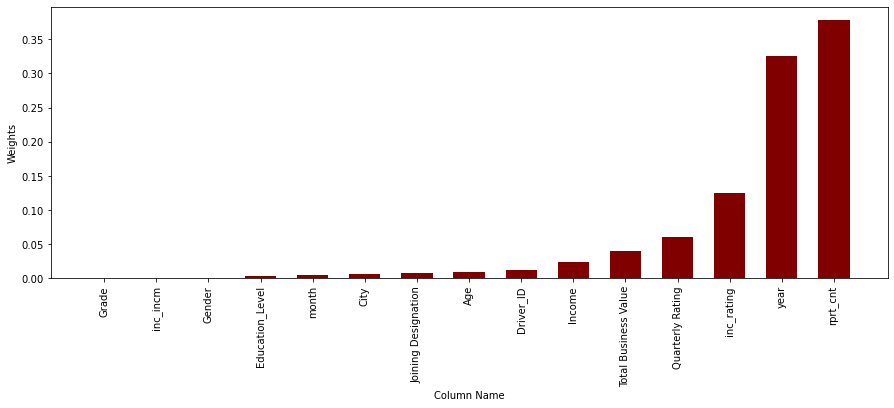

In [40]:
importance = pd.DataFrame({'Column_Name':X.columns,
                          'Feature_importance':fea_imp}).sort_values(by=['Feature_importance'])
plt.figure(figsize=(15,5))
plt.bar(importance['Column_Name'],importance['Feature_importance'], color ='maroon',width = 0.6)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Weights')
plt.show()

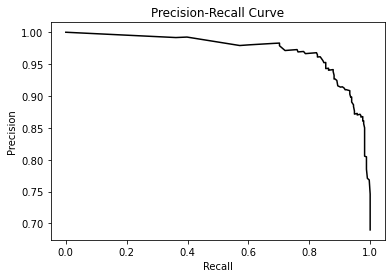

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test1, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='black')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

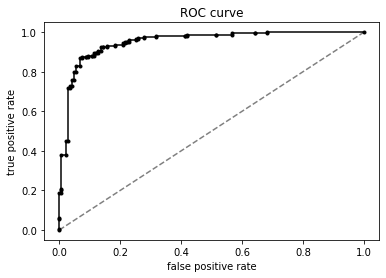

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, prob1[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='black')
plt.title("ROC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# show the plot
plt.show()

# `INSIGHTS`

- July received the maximum number of drivers in 8 years.
- February and March receives the least number of Drivers joining OLA.
- Joining of Drivers receives a boost after year 2017.
- Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
- 58.9% of the Drivers are male.
- City C20 has been used by the most of the drivers.
- There are 3 Education levels and all of them alomst have the equal distribution of Drivers.
- Grade 2 has been received by most of the Drivers and then the graph keeps on falling.
- People with joining designation 4 and 5 have higher income.
- Outliers can be seen in Income with respect to Education level.
- Outliers in income decreases as increase in ages of the Drivers.
- Income of Drivers with Grade 4 and 5 have are higher earning.
- Income of Drivers decreses with time during 8 years.
- Increse in Age, Increse in Grade.
- Joining Designation increses with Grade.

# `RECOMMENDATIONS`

- Counts of drivers are increasing drastically every year and July sees the highest joining numbers where as March sees the least joining numbers, Ola should lower their operations in the month of March and higher their operations in the month of July for new hires.
-  Drivers that has comparatively less reporting time are most likely to leave (get churned), thus to keep them connected Ola needs to provide perks and good incomes.
- City C20 has highest numbers of drivers among all the other Cities so OLA should upgrade prices for other Cities to to encourage more admission of Drivers.
- With every Upgradation in Grades and Quarterly Rating, OLA should reward or provide incentives.



# `SUBMITTED BY:`
## `NOOHI NAAZ`
